In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('../')

In [3]:
import glob
import pandas as pd

from matplotlib import pyplot as plt
from util import csv_util

In [4]:
reachers = [csv_util.load_csv_file(filename) for filename in glob.glob('examples/csv_log/*')]

for reacher in reachers:
    if 'ReacherOne' in reacher['filename']:
        reacher['name'] = 'ReacherOne'        
    if 'ReacherTwo' in reacher['filename']:
        reacher['name'] = 'ReacherTwo'        
    if 'ReacherThree' in reacher['filename']:
        reacher['name'] = 'ReacherThree'        
    if 'ReacherFive' in reacher['filename']:
        reacher['name'] = 'ReacherFive'

In [5]:
PALETTE = [
    '#332288', # indigo
    '#88cc33', # cyan
    '#44aa99', # teal
    '#117733', # green
    '#999933', # olive
    '#ddcc77', # sand
    '#cc6677', # rose
    '#882255', # wine
    '#aa4499', # purple
    '#dddddd', # pale gray
]

def plot(data_list, x_key, y_key, legend_key, separate_keys=[], linewidth=1, avg_window=1):
    df_list = []
    for lid, data in enumerate(data_list):
        df = pd.DataFrame(data)
        df['lid'] = lid
        df_list.append(df)
    df = pd.concat(df_list)
    
    df = df.set_index(x_key).sort_index()
    
    line_idx = 0
    line_names = []
    ret_legend_names = []
    if len(separate_keys) == 0:
        legend_names = list(set(df[legend_key]))
        for legend_name in legend_names:
            legend_df = df.loc[df[legend_key] == legend_name]
            lids = list(set(legend_df['lid']))
            lid_series = pd.concat([legend_df.loc[legend_df['lid'] == lid][y_key] for lid in lids], axis=1)
            lid_series = lid_series.rolling(window=avg_window).mean()
            line_mean = lid_series.mean(axis=1)
            line_std = lid_series.std(axis=1)
            linecolor = PALETTE[line_idx]
            plt.plot(lid_series.index, line_mean, color=linecolor, linewidth=linewidth)
            plt.fill_between(lid_series.index, line_mean - line_std, line_mean + line_std, alpha=0.2, facecolor=linecolor)
            ret_legend_names.append(legend_name)
            line_idx += 1
    else:
        raise NotImplementedError('TODO')
    return ret_legend_names
        
        
    

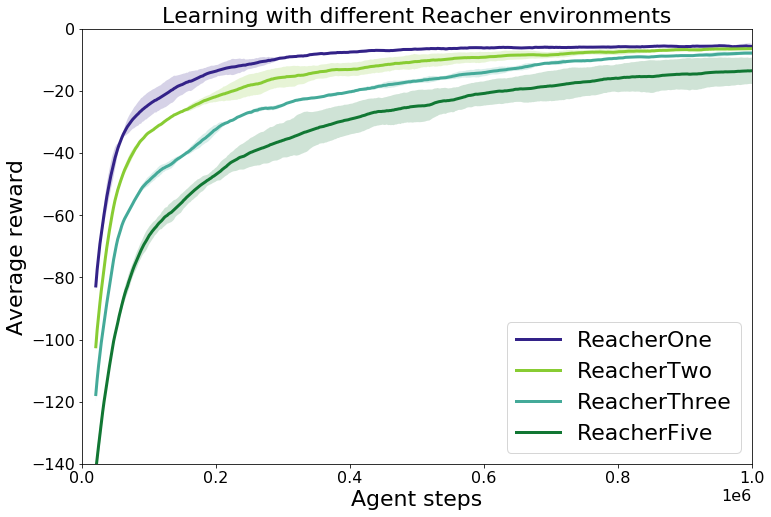

In [11]:
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor('white')
legend_names = plot(reachers, 'totalsteps', 'avg_reward', 'name', avg_window=10, linewidth=3)
plt.title('Learning with different Reacher environments', fontsize=22)
plt.legend(legend_names, fontsize=22, loc='best', frameon=True)
plt.ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
plt.gca().xaxis.get_offset_text().set_size(16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Agent steps', fontsize=22)
plt.ylabel('Average reward', fontsize=22)
plt.xlim([0, 1e6])
plt.ylim([-140, 0])
plt.show()